# Trump Tweet Analysis 
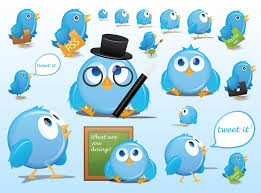


Twitter's strength is real-time.The data provided by Twitter, and the insights we're able to glean from them, can be truly world-changing, in more ways than most people realize.
Hopin to do some great analysis here :)

# Importing the packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

# Importing the data

![](https://media1.tenor.com/images/98903ddc119a5a5d5e3e9d44f13339eb/tenor.gif?itemid=18753904)

In [ ]:
data=pd.read_csv('../input/all-trumps-twitter-insults-20152021/trump_insult_tweets_2014_to_2021.csv')

In [ ]:
data.head()

# Insult Count Over Time For Trump

![](https://media.tenor.com/images/2957d1de70d8b0e36dd209e3fda2865e/tenor.gif)

In [ ]:
data['Year']=data['date'].apply(lambda x: int(x.split('-')[0]))
vals=data['Year'].value_counts()
vals=vals.sort_index()
sns.jointplot(x=vals.index,y=vals.values,kind='reg',color='orange')

The number of insults in tweets has clearly increased over time 

# Monthly Distribution of the insults over the years 

In [ ]:
import plotly.graph_objects as go
data['Months']=data['date'].apply(lambda x: int(x.split('-')[1]))
l=[]
l2=[]
c=['#667D90','#BCDC97','#4F2BEA','#D6182F','#F11EC2','#41A9EA','#4AE299','#E4CECE','#3EDAAF','#67083F','#4C92DB','#AD7655']
count=0
for i in range(2014,2021):
    io=[False]*8
    io[count]=True
    d=data[data['Year']==i]
    vals=d['Months'].value_counts()
    vals=vals.sort_index()
    l.append(go.Bar(name=str(i),x=[str(i) for i in vals.index],y=vals.values,marker=dict(color=c)))
    l2.append(dict(label=str(i),
                  method="update",
                   args=[{"visible":io},{"Title":str(i)}]
                  ))
    count+=1
plot=go.Figure(data=l)
plot.update_layout(updatemenus=[
    dict(active=0 ,
        buttons=l2)],template='plotly_dark')
plot.update_layout(title='2014')
plot.show()

# Word cloud for target text

In [ ]:
data['target']=data['target'].apply(lambda x:str(x))
tt=np.load('../input/masked-images/trump.npy')
tt2=~tt
target_text = " ".join(data.target)

wordcloud = WordCloud(width=2000, height=2000,mask=tt2,background_color='white').generate(target_text)
plt.figure(figsize=(34,24))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Word cloud for Insults

In [ ]:
target_text = " ".join(data.insult)

wordcloud = WordCloud(width=1500, height=500).generate(target_text)

plt.figure( figsize=(30,24))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Word cloud for Tweets

In [ ]:
tweet_text = " ".join(data.tweet)
twitter_mask=np.load('../input/twitter-mask/twitter.npy')
twitter_mask=~twitter_mask
wordcloud = WordCloud(width=1500, height=500,mask=twitter_mask,background_color='white').generate(tweet_text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Hope you liked the file :)

![](https://i.pinimg.com/originals/4f/92/fe/4f92fe4ee07e79bc3495e41bb5ae1bd3.gif)